In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from interest_rates import *
import os

In [2]:
df = pd.read_csv('data/final_ratings.csv')
print(df.shape)
df.head(2)

(100000, 2)


,id,rate
0,100001,0.991565
1,100002,0.443311


In [3]:
df2 = pd.read_csv('data/break_even_rate.csv')
print(df2.shape)
df2.head(2)

(100000, 2)


,id,break_even_rate
0,100001,0.874150
1,100002,0.375737


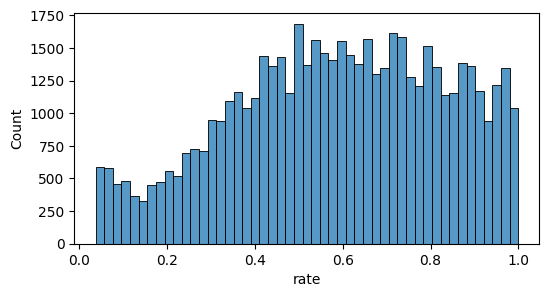

In [4]:
fig, ax = plt.subplots(1,1,figsize=(6,3))
sns.histplot(df.rate)
plt.show()

In [5]:
sum(df.rate.isna())*100/df.shape[0]

46.03

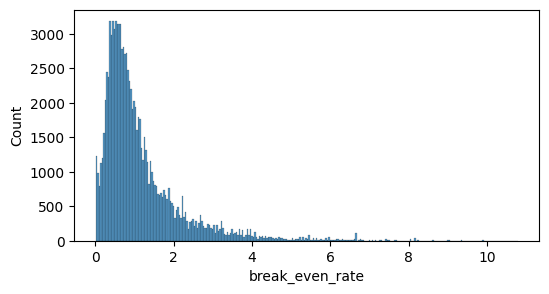

In [6]:
fig, ax = plt.subplots(1,1,figsize=(6,3))
sns.histplot(df2.break_even_rate)
plt.show()

In [2]:
dirname = os.path.dirname
root = os.getcwd()

data_path = os.path.join(dirname(root), "data")
path = os.path.join(data_path,"PastLoans.csv")
path_new_set = os.path.join(data_path, "NewApplications_3_Round1.csv")
path_proba = os.path.join(root + '/data', 'default_predictions.csv') #the dataset with the probabilities of default
columns_test = ["competing1","competing2","rate"]

In [3]:
probas = pd.read_csv(path_proba)
df_new_preds = pd.read_csv(path_new_set, index_col="id")
index_ids = df_new_preds.index
df_preds = compute_interest_rates(probas, 0.02, index_ids)
df_past_results = pd.read_csv(os.path.join(data_path,"profit_31.csv"))
df_back_test = df_past_results.merge(df_preds, on='id', how="inner")
df_back_test["winner"] = df_back_test[columns_test].min(axis=1)
df_clients_won = df_back_test[df_back_test["winner"]==df_back_test["rate"]]

print(f"Profits made with this strategy during backtesting : {df_clients_won['profit'].sum()}")

Profits made with this strategy during backtesting : -423758.6283


In [4]:
df_clients_won.shape

(765, 13)